In [86]:
import torch
import cv2
import matplotlib.pyplot as plt
from matplotlib import gridspec
from CycleGAN_models import *
from tqdm.notebook import tqdm

data = torch.load('../datasets/64skulldataset.pt')
olddata = torch.load('../datasets/64dataset.pt')
torchio = torch.load('../datasets/64torchiodataset.pt')
extraAD1 = torch.load('../datasets/GAN_noSS/64ADgan1noSS.pt')
extraAD2 = torch.load('../datasets/GAN_noSS/64ADgan2noSS.pt')
extraAD3 = torch.load('../datasets/GAN_noSS/64ADgan3noSS.pt')
extraNC1 = torch.load('../datasets/GAN_noSS/64NCgan1noSS.pt')
extraNC2 = torch.load('../datasets/GAN_noSS/64NCgan2noSS.pt')
extraNC3 = torch.load('../datasets/GAN_noSS/64NCgan3noSS.pt')
extraAD = [([extraAD1[j][0], extraAD2[j][0], extraAD3[j][0]], extraAD1[j][1]) 
              for j in tqdm(range(len(extraAD1))) ]
extraNC = [([extraNC1[j][0], extraNC2[j][0], extraNC3[j][0]], extraNC1[j][1]) 
              for j in tqdm(range(len(extraNC1))) ]

In [108]:
def norm(dataset):
    output = []
    for sample in dataset:
        newimg = []
        img = sample[0]
        label = sample[1]
        for s in img:
            s = s[0]
            s /= torch.max(s)
            s = torch.stack([s, s, s], 0)
            newimg.append(s)
        output.append((newimg, label))
    return output

olddata = norm(olddata)
data = norm(data)
torchio = norm(torchio)

In [ ]:
# need to normalize datasets when adding gan images

x = extraAD[0][0][0][0]
print(torch.max(x))

x = data[0][0][0][0]
print(torch.max(x))

x = torchio[0][0][0][0]
print(torch.max(x))

x = olddata[0][0][0][0]
print(torch.max(x))

In [114]:
olddata[10][1]

tensor(1)

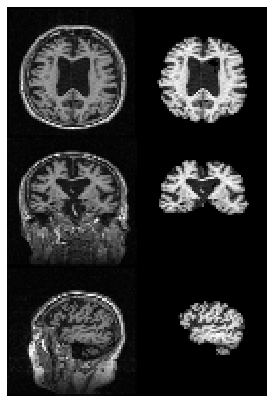

In [115]:
a = 10

fig = plt.figure(figsize=(8, 12)) 

gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1],
     wspace=0.0, hspace=0.0, top=0.5, bottom=0.05, left=0.17, right=0.62) 

for i in range(3):
    ax= plt.subplot(gs[i,0])
    ax.imshow(olddata[a][0][i][0],cmap = 'gray')
    plt.axis('off')

for i in range(3):
    ax= plt.subplot(gs[i,1])
    ax.imshow(data[a][0][i][0],cmap = 'gray')
    plt.axis('off')

plt.show()


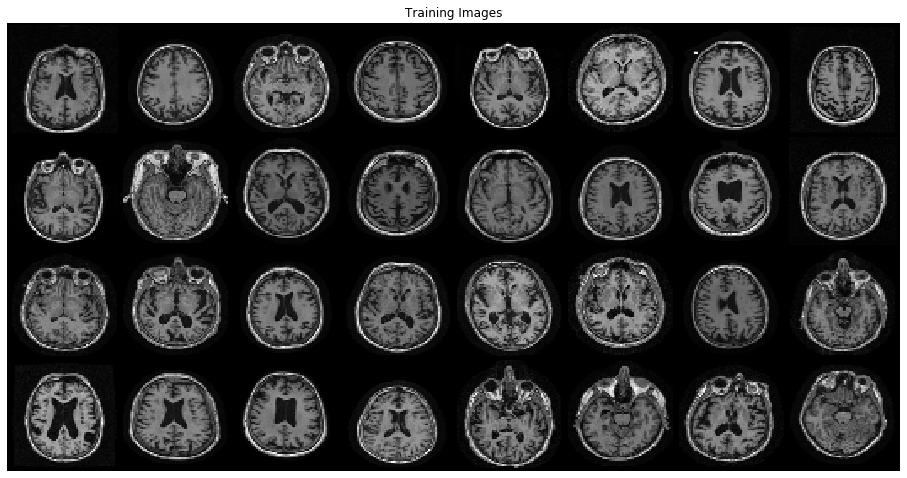

In [109]:
import torchvision
from torch.utils.data import Dataset, DataLoader
dataloader = DataLoader(olddata, batch_size=32,shuffle=True, num_workers=4)
batch = next(iter(dataloader))
plt.figure(figsize=(16,16))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(
    torchvision.utils.make_grid(batch[0][0], padding=2, normalize=True),(1,2,0)))
plt.show()

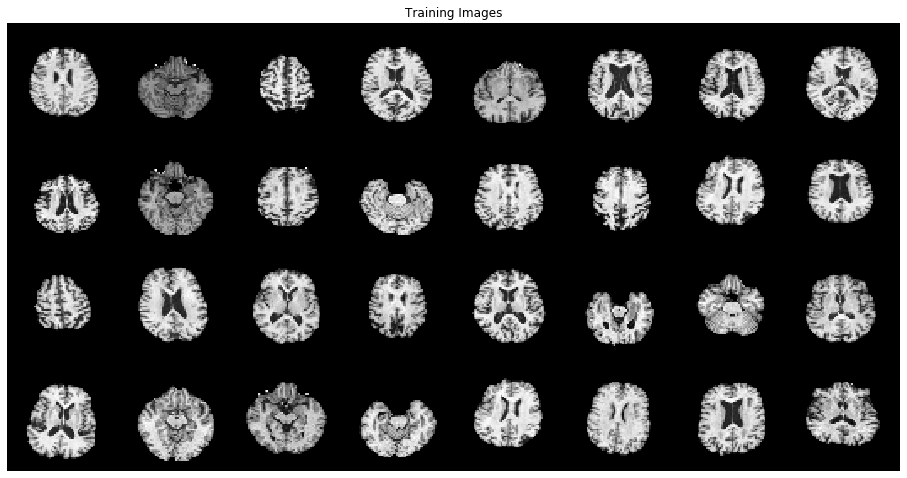

In [110]:
import torchvision
from torch.utils.data import Dataset, DataLoader
dataloader = DataLoader(data, batch_size=32,shuffle=True, num_workers=4)
batch = next(iter(dataloader))
plt.figure(figsize=(16,16))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(
    torchvision.utils.make_grid(batch[0][0], padding=2, normalize=True),(1,2,0)))
plt.show()

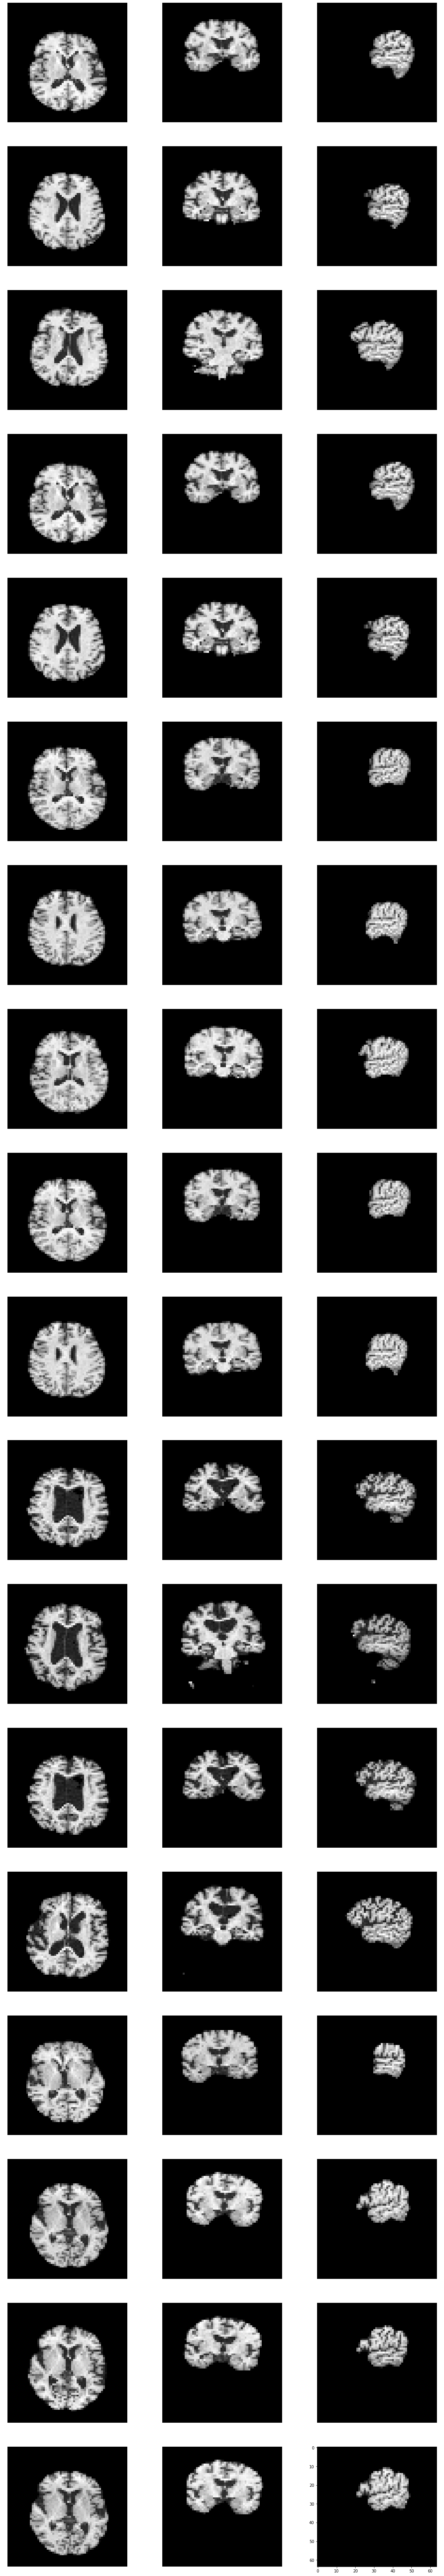

In [111]:
fig = plt.figure(figsize = (20,120))
num = 1
for i in range(18):
    for s in range(3):
        plt.axis("off")
        y = fig.add_subplot(18, 3, num)    
        y.imshow(data[i][0][s][0], cmap = 'gray')
        num += 1

plt.show()

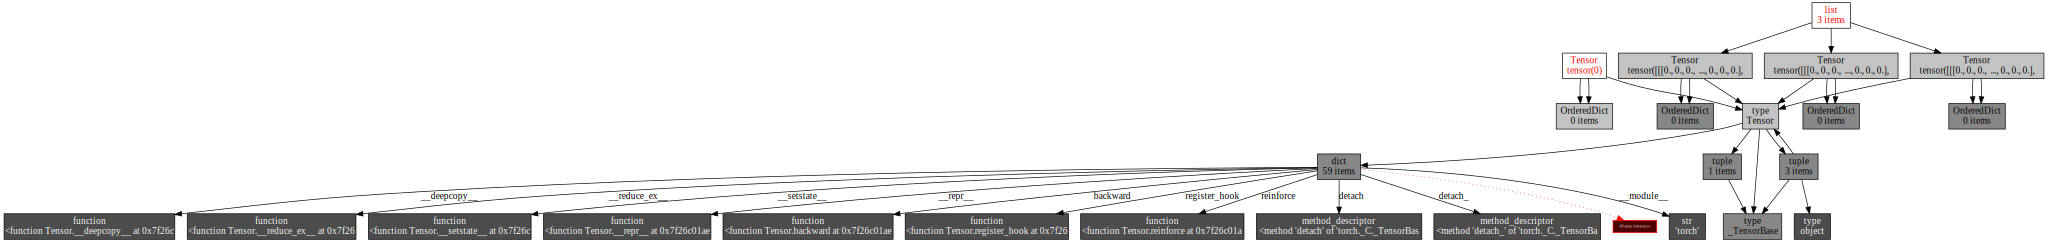

In [9]:
import objgraph
objgraph.show_refs(data[0], filename='datastructure.png')


In [10]:
# from lolviz import *
# data = data
# g = lolviz(data[:5])
# print(g.source) # if you want to see the graphviz source
# g.view() # render and show graphviz.files.Source object


    digraph G {
        nodesep=.05;
        ranksep=.4;
        rankdir=LR;
        node [penwidth="0.5", shape=box, width=.1, height=.1];

    node139803872926448 [color="#444443", margin="0.02", fontcolor="#444443", fontname="Helvetica", style=filled, fillcolor="#cfe2d4", label=<<table BORDER="0" CELLPADDING="0" CELLBORDER="0" CELLSPACING="0">
<tr><td port="0" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">0</font></td>
</tr>
<tr><td port="1" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">1</font></td>
</tr>
<tr><td port="2" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">2</font></td>
</tr>
<tr><td port="3" BORDER="1" cellpadding="2" cellspacing="0" sides="b" bgcolor="#cfe2d4" align="left"><font color="#444443" point-size="9">3</font></td>
</tr>
<tr><td port="4" B

'Source.gv.pdf'

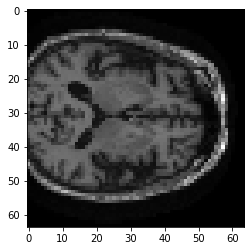

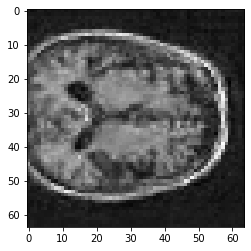

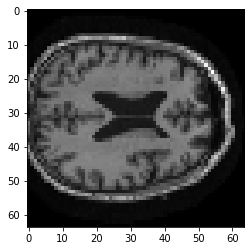

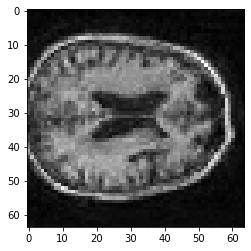

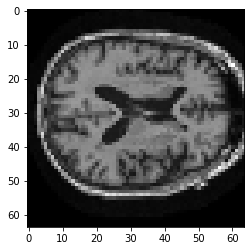

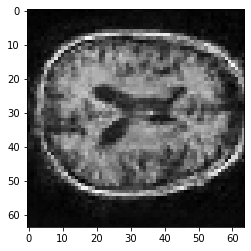

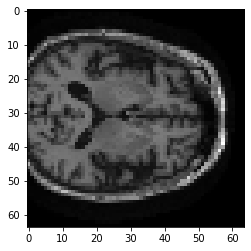

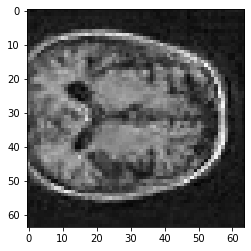

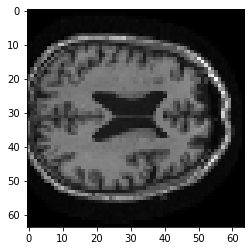

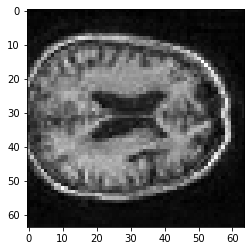

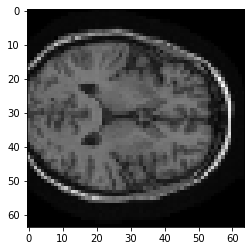

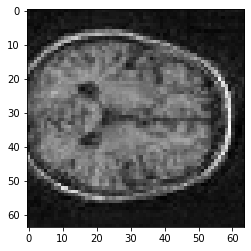

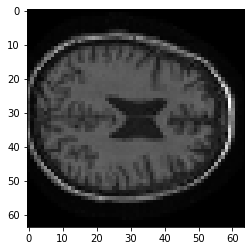

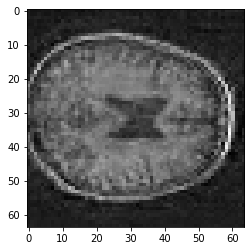

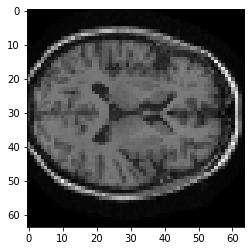

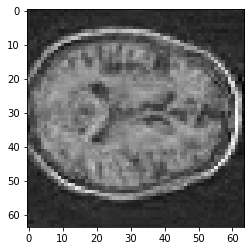

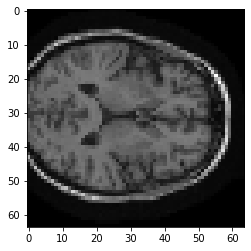

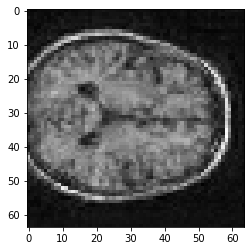

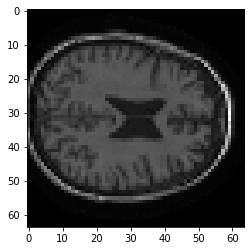

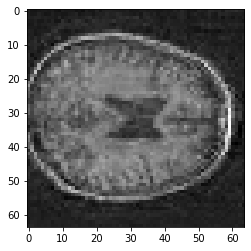

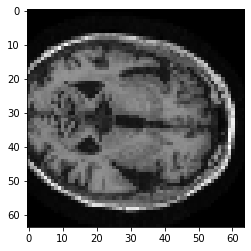

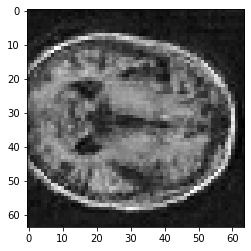

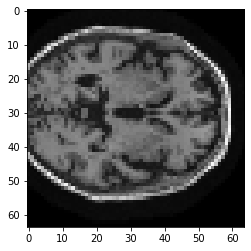

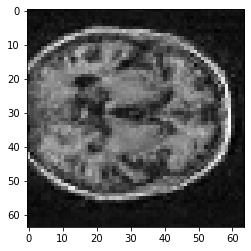

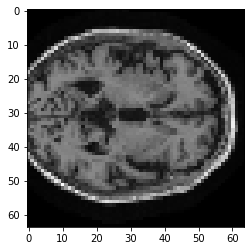

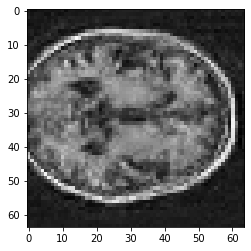

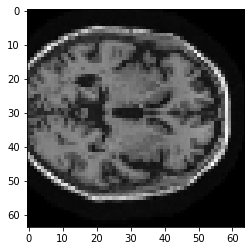

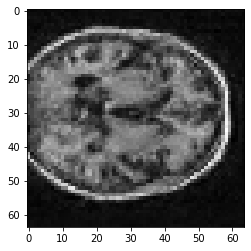

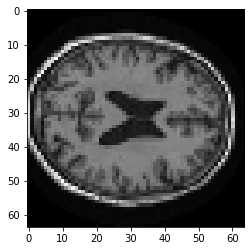

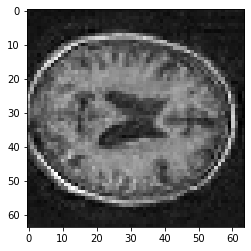

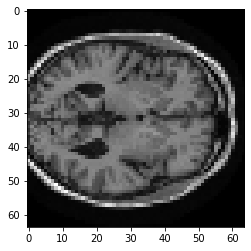

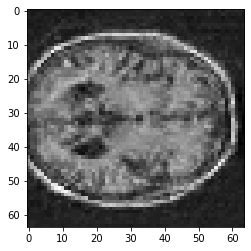

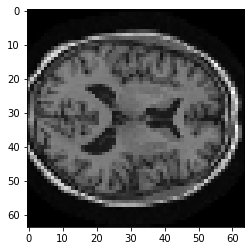

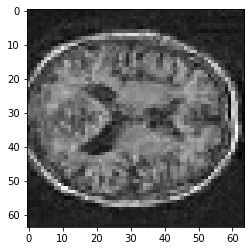

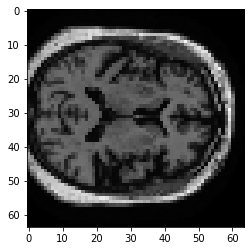

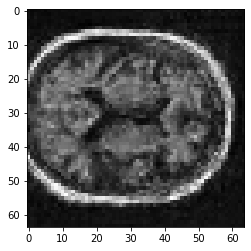

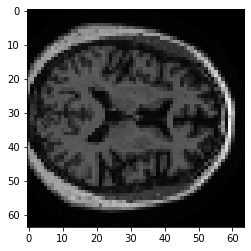

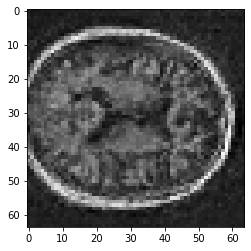

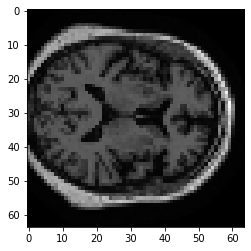

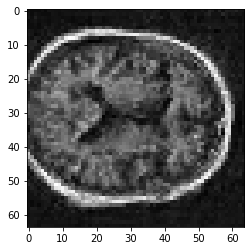

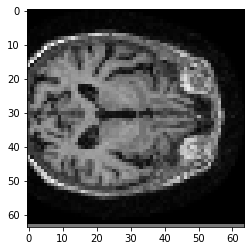

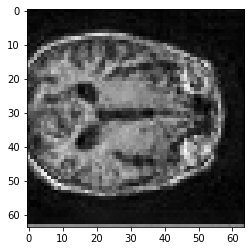

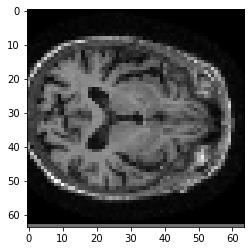

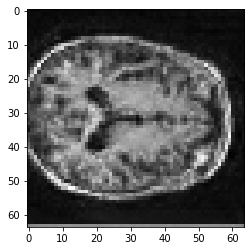

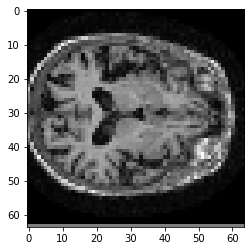

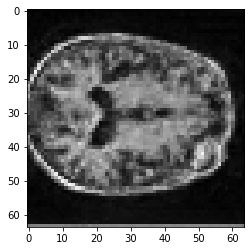

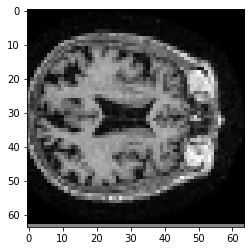

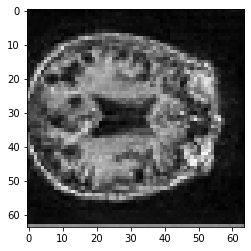

KeyboardInterrupt: 

In [54]:
import torch
from CycleGAN_models import *
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

dataset = torch.load("../datasets/64torchiodataset.pt")
dataset = [sample for sample in torchio if sample != None]

NC = []
AD = []

for i in dataset:
    if i[1] == 0:
        NC.append(i)
    else:
        AD.append(i)
        
def process_gan(dataset, s):
    
    output = []
    dataset = [sample[0] for sample in dataset]
    for sample in dataset:
        sample = sample[s][0]
        sample /= torch.max(sample)
        output.append(torch.unsqueeze(sample, 0))
    return output

        
NCset1 = process_gan(NC, 0)
NCset2 = process_gan(NC, 1)
NCset3 = process_gan(NC, 2)

ADset1 = process_gan(AD, 0)
ADset2 = process_gan(AD, 1)
ADset3 = process_gan(AD, 2)

epoch = 25
input_shape = (1, 64, 64)
dataset_name = 'CycleGANbig3'

G_AB = GeneratorResNet(input_shape, 9).cuda()
G_BA = GeneratorResNet(input_shape, 9).cuda()
G_AB.load_state_dict(torch.load("saved_models/%s/G_AB_%d.pth" % (dataset_name, epoch)))
G_BA.load_state_dict(torch.load("saved_models/%s/G_BA_%d.pth" % (dataset_name, epoch)))

for imgs in tqdm(NCset3):

    G_AB.eval()
    
    real_A = torch.unsqueeze(Variable(imgs.type(torch.cuda.FloatTensor)), 0)
    fake_B = torch.squeeze(G_AB(real_A))
    fake_B = fake_B.detach().cpu()
    real_A = torch.squeeze(real_A.detach().cpu())
    
    plt.imshow(real_A, cmap = 'gray')
    plt.show()
    plt.imshow(fake_B, cmap = 'gray')
    plt.show()

In [85]:
#!/usr/bin/env python
# coding: utf-8

import cv2
import numpy as np
import os
import sys
import pandas as pd
from random import shuffle
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, datasets, models
from PIL import Image
import nibabel as nib
import time
import copy
from deepbrain import Extractor
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def create_paths(datapath):
    #     Create paths to all nested images
    imagepaths = []
    for root, dirs, files in os.walk(datapath, topdown=False):
        for name in files:
            imagepaths.append(os.path.join(root, name))
    return imagepaths

def get_label(imagepath, csvpath):
    #     Get the diagnosis label for path
    table = pd.read_csv(csvpath)
    idpath = imagepath.split('/')[13]
    img_id = idpath[idpath.find('_I') + 2:-4]
    group = table.loc[table['Image Data ID'] == int(
        img_id)]["Group"].reset_index(drop=True)[0]
    group_to_label = {'CN': 0, 'AD': 1, 'MCI': 2}
    label = group_to_label[group]
    return label

class ADNI(Dataset):
    def __init__(self, datapath, csvpath, labels = [0, 1, 2], transform=None):
        """
        Args:
            datapath (string): Directory with all the images.
            csvpath (string): Path to CSV. 
            labels (list): labels to retrieve. 'CN': 0, 'AD': 1, MCI': 2
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        all_imagepaths = create_paths(datapath)[:-1]
        self.csvpath = csvpath
        self.imagepaths = [path for path in tqdm(all_imagepaths) if get_label(path, csvpath) in labels] 
        self.transform = transform

    def __len__(self):
        #         Returns the length of the dataset
        return len(self.imagepaths)

    def __getitem__(self, idx):
        #         Returns a tuple of the image and its group/label
        imgsize = 64

        if torch.is_tensor(idx):
            idx = idx.tolist()
        imagepath = self.imagepaths[idx]
        label = get_label(imagepath, csvpath)

        
        #         create imgbatch with three different perspectives
        imgbatch = []
        
        imgdata = nib.load(imagepath).get_fdata()
        prob = Extractor().run(imgdata) 
        mask = prob > 0.5
        imgdata[~mask] = 0
        if self.transform:
            imgdata = self.transform(imgdata)
            
        imgdata1 = cv2.resize(imgdata[96, :, :], (imgsize, imgsize))
        imgdata1 = torch.from_numpy(imgdata1)
        imgdata1 = torch.stack([imgdata1, imgdata1, imgdata1], 0)
        imgbatch.append(imgdata1.reshape(3, imgsize, imgsize))
        
        imgdata2 = cv2.resize(imgdata[:, imgdata.shape[0]//2, :], (imgsize, imgsize))
        imgdata2 = torch.from_numpy(imgdata2)
        imgdata2 = torch.stack([imgdata2, imgdata2, imgdata2], 0)
        imgbatch.append(imgdata2.reshape(3, imgsize, imgsize))
        
        imgdata3 = cv2.resize(imgdata[:, :, imgdata.shape[0]//2], (imgsize, imgsize))
        imgdata3 = torch.from_numpy(imgdata3)
        imgdata3 = torch.stack([imgdata3, imgdata3, imgdata3], 0)
        imgbatch.append(imgdata3.reshape(3, imgsize, imgsize))
        
        sample = (imgbatch, torch.tensor(label))
        return sample


datapath = r"/media/swang/Windows/Users/swang/Downloads/ADNI1_Complete_1Yr_1.5T"
csvpath = r"/media/swang/Windows/Users/swang/Downloads/ADNI1_Complete_1Yr_1.5T_7_08_2020.csv"
dataset = ADNI(datapath, csvpath, labels = [0,1])

data = [sample for sample in tqdm(dataset)]
torch.save(data, './../datasets/64skulldataset.pt')


/home/swang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/swang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/swang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/swang/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.


Instructions for updating:
Use tf.gfile.GFile.




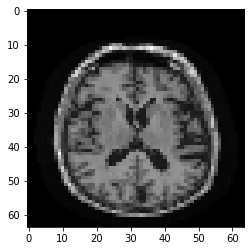

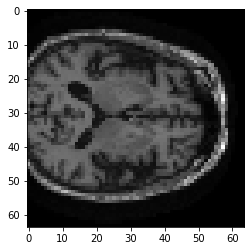

In [75]:
plt.imshow(dataset[0][0][0][0], cmap = 'gray')
plt.show()
plt.imshow(NCset3[0][0], cmap = 'gray')
plt.show()